In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


**TASK 1**

In [9]:

trn = pd.read_csv('BreastCancer_trn.csv')

trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,y
0,3,1,1,1,3,2,1,1,1,benign
1,5,1,3,1,2,1,2,1,1,benign
2,7,5,6,10,4,10,5,3,1,malignant
3,1,1,1,3,1,3,1,1,1,benign
4,2,1,1,1,3,1,2,1,1,benign


**TASK 2**

In [10]:
X_trn = trn.filter(regex = '\d')

Y_trn = trn.y

tst = pd.read_csv('BreastCancer_tst.csv')

X_tst = tst.filter(regex = '\d')

Y_tst = tst.y

cancer = ['Benign', 'Malignant']

knn = KNeighborsClassifier(n_neighbors = 5).fit(X_trn, Y_trn)

print("Accuracy on training data: " + str("{:.2%}".format(knn.score(X_trn, Y_trn))))


Accuracy on training data: 97.91%


**Task 3**

In [11]:
knn = KNeighborsClassifier()

param = range(3,15,2)

grid = GridSearchCV(knn, {'n_neighbors' : param})

best_knn = grid.fit(X_trn, Y_trn).best_estimator_

best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'uniform'}

**Task 4**

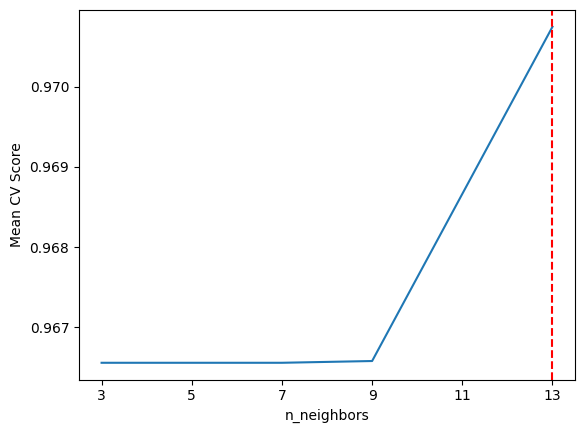

In [12]:
plt.plot(param, grid.cv_results_['mean_test_score'])

plt.xticks(param)
plt.ylabel("Mean CV Score")
plt.xlabel("n_neighbors")

plt.axvline(x=best_knn.n_neighbors, color='red', ls='--')


**Task 5**

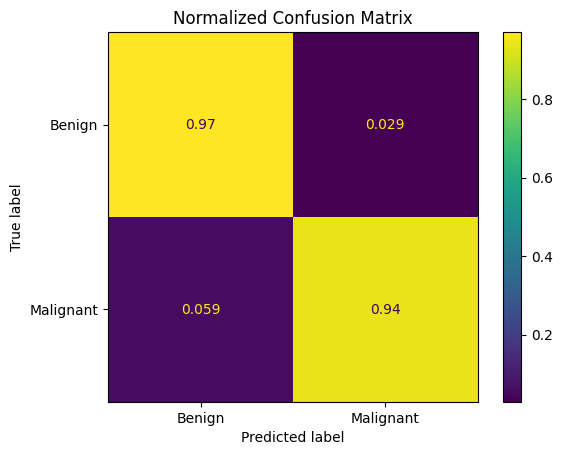

In [15]:
ConfusionMatrixDisplay.from_estimator(
    best_knn,
    X_tst,
    Y_tst,
    display_labels=cancer,
    normalize='true'
)

plt.title("Normalized Confusion Matrix")
plt.show()

**TASK 6**

In [17]:

print("Accuracy on training data: " + str("{:.2%}".format(best_knn.score(X_trn, Y_trn))))
print("Accuracy on testing data: " + str("{:.2%}".format(best_knn.score(X_tst, Y_tst))))


Accuracy on training data: 97.70%
Accuracy on testing data: 96.10%
